### Posterior Predictive Simulation 
https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=3d0f120fd0e320c42ca94f687fdec9efb87272d7  

Given: \
• Observed data $y$\
• Model parameters $\theta$ \
• Posterior distribution $p(\theta|y)$ \
• Likelihood $p(\tilde{y}|\theta)$ for new data $\tilde{y}$

The posterior predictive distribution is:
$p(\tilde{y}|y) = \int p(\tilde{y}|\theta)p(\theta|y)d\theta$

Posterior predictive simulation algorithm:
1. Draw samples $\theta^{(s)}$ from the posterior $p(\theta|y)$
2. For each $\theta^{(s)}$, draw a simulated data point $\tilde{y}^{(s)}$ from $p(\tilde{y}|\theta^{(s)})$

The collection of $\tilde{y}^{(s)}$ approximates the posterior predictive distribution $p(\tilde{y}|y)$

##### 1) Observe data $y∼N(\mu=5,\sigma=2)$

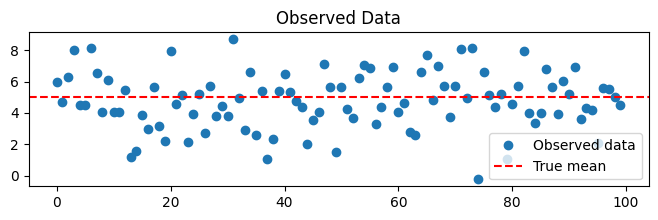

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm

# Simulate observed data
np.random.seed(42)
true_mu = 5
true_sigma = 2
n = 100
y = np.random.normal(loc=true_mu, scale=true_sigma, size=n)

plt.figure(figsize=(8, 2))
plt.plot(y, 'o', label='Observed data')
plt.axhline(true_mu, color='r', linestyle='--', label='True mean')
plt.title('Observed Data')
plt.legend()
plt.show()

##### 2) Run MCMC to obtain samples $\theta^{(s)} = (\mu^{(s)}, \sigma^{(s)})$ from the posterior distribution $p(\mu,\sigma|y)$
Corresponds to step 1 in posterior predictive simulation algorithm: 
- Draw samples $\theta^{(s)}$ from the posterior $p(\theta|y)$

In [2]:
# 3. Build and sample from the PyMC model
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sigma=10) # prior for mu
    sigma = pm.HalfNormal('sigma', sigma=2) # prior for sigma
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=y) # likelihood for y
    trace = pm.sample(1000, tune=1000, cores=1, chains=4, random_seed=42, return_inferencedata=True)  #run MCMC 4 times (chaing=4) with 1000 samples, and 1000 burn-in (tune=1000) samples

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [mu, sigma]


/opt/anaconda3/envs/bnns/lib/python3.13/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


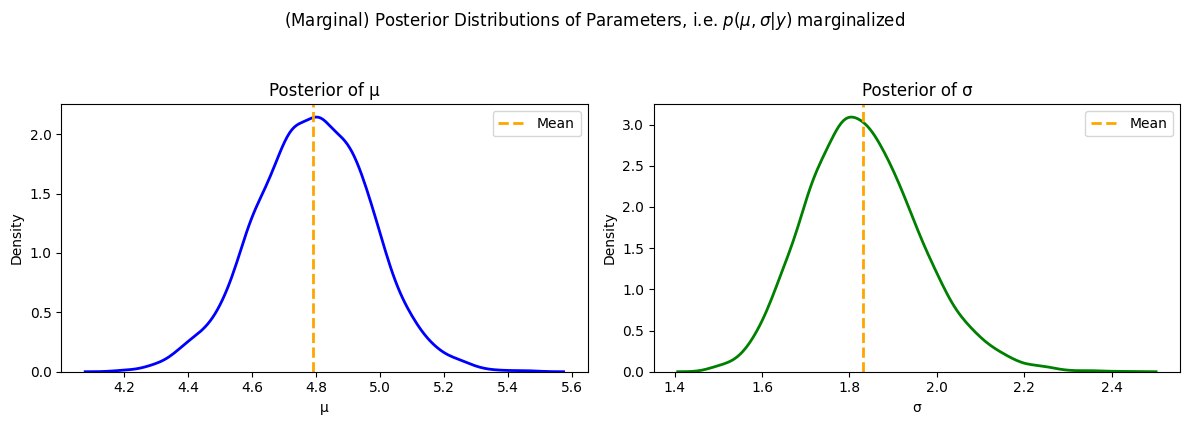

In [3]:
# Extract posterior samples
mu_samples = trace.posterior['mu'].values.flatten()
sigma_samples = trace.posterior['sigma'].values.flatten()

plt.figure(figsize=(12, 4))

# Marginal posterior for mu
plt.subplot(1, 2, 1)
sns.kdeplot(mu_samples, color='blue', linewidth=2)
plt.axvline(np.mean(mu_samples), color='orange', linestyle='--', linewidth=2, label='Mean')
plt.title('Posterior of μ')
plt.xlabel('μ')
plt.ylabel('Density')
plt.legend()

# Marginal posterior for sigma
plt.subplot(1, 2, 2)
sns.kdeplot(sigma_samples, color='green', linewidth=2)
plt.axvline(np.mean(sigma_samples), color='orange', linestyle='--', linewidth=2, label='Mean')
plt.title('Posterior of σ')
plt.xlabel('σ')
plt.ylabel('Density')
plt.legend()

plt.suptitle('(Marginal) Posterior Distributions of Parameters, i.e. $p(\\mu,\\sigma|y)$ marginalized', y=1.05)
plt.tight_layout()
plt.show()

##### 3) For each sample $\theta^{(s)} = (\mu^{(s)}, \sigma^{(s)})$ from the posterior, draw a new value $\tilde{y}^{(s)}$ from $N(\mu^{(s)}, \sigma^{(s)})$


In [4]:
# 5. For each posterior sample, draw one y_tilde (posterior predictive sample)
mu_samples = trace.posterior['mu'].values.flatten()
sigma_samples = trace.posterior['sigma'].values.flatten()
y_tilde = np.random.normal(mu_samples, sigma_samples)


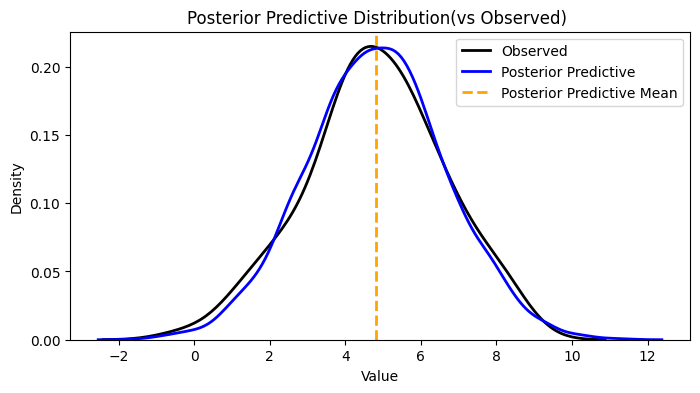

In [5]:
# 6. Plot KDEs: observed, posterior predictive, and posterior predictive mean
plt.figure(figsize=(8, 4))
sns.kdeplot(y, color='black', label='Observed', linewidth=2)
sns.kdeplot(y_tilde, color='blue', label='Posterior Predictive', linewidth=2)
plt.axvline(np.mean(y_tilde), color='orange', linestyle='--', label='Posterior Predictive Mean', linewidth=2)
plt.title('Posterior Predictive Distribution(vs Observed) ')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()